In [2]:
## Import modules

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import xarray as xr 
from matplotlib.gridspec import GridSpec
from matplotlib.colors import  LinearSegmentedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import cartopy.crs as ccrs
import matplotlib as mpl

import matplotlib.colors as mcolors
import matplotlib.cm as cm

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import seaborn as sns

import metpy.calc as mpcalc
from metpy.interpolate import cross_section

import sys
sys.path.append('/home/freimax/msc_thesis/scripts/helpers/')
from data_preprocessing_helpers import PRES_3d, calc_RH_w, get_lonlatbox, inter2level, get_cross_section_data

In [3]:
## Import data
ds_p = xr.open_mfdataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/P_p*_lonlatbox.nc')
ds_s = xr.open_mfdataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/S_p*_lonlatbox.nc')
ds_cc = xr.open_mfdataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/additional_fields/CC_p*.nc')
da_rh = xr.open_dataset('/home/freimax/msc_thesis/data/case_study_ra19/ifs_17/additional_fields/RH_ifs.nc')


---

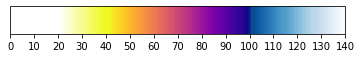

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plasma_r = plt.cm.get_cmap('plasma_r', 100)
skyblue = plt.cm.get_cmap('Blues_r', 40)

colors0 = np.linspace([1, 1, 1, 1], [1, 1, 1, 1], 20)   #np.array([[1, 1, 1, 1]])  # White color
white_to_yellow = np.linspace([1, 1, 1, 1], plasma_r(0), 20)
colors1 = white_to_yellow
colors2 = plasma_r(np.linspace(0, 1, 60))
colors3 = skyblue(np.linspace(0.1, 1, 40))

colors = np.vstack((colors0, colors1, colors2, colors3))
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cb1 = plt.colorbar(mappable=cm.ScalarMappable(norm=None, cmap=custom_cmap), cax=ax, orientation='horizontal')
cb1.set_ticks(np.linspace(0, 1, 15))
cb1.set_ticklabels(np.arange(0, 145, 10))
plt.show()

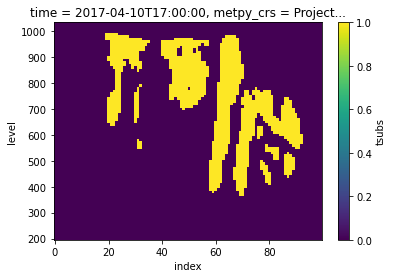

In [35]:
tsubs_thr = -0.01
mask_foo = (cross_p.tsubs < tsubs_thr)
mask_foo.plot()

/tmp/ipykernel_4327/967321231.py:26: UserWarning: No contour levels were found within the data range.
  cs_SWC = ax.contour(cross_p['lon'], cross_p['level'], edge_mask * cross_p['SWC'], levels=[0.5],  linewidths=1.5)


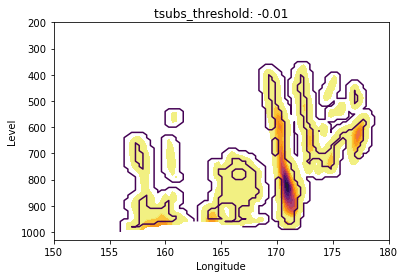

In [36]:

from scipy import ndimage

# Create a binary mask of non-zero tsubS values
tsubs_thr = -0.01




tsubS_mask = (cross_p.tsubs < tsubs_thr).astype(int)

# Apply the Sobel operator for edge detection
sobel_x = ndimage.sobel(tsubS_mask, axis=0)  # Gradient along the X-axis
sobel_y = ndimage.sobel(tsubS_mask, axis=1)  # Gradient along the Y-axis

#sobel_x = ndimage.sobel(cross_p.tsubs, axis=0)  # Gradient along the X-axis
#sobel_y = ndimage.sobel(cross_p.tsubs, axis=1)  # Gradient along the Y-axis
# Calculate the magnitude of the gradient
sobel_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2 )

# Create a binary mask of edges
edge_mask = (sobel_magnitude > 0).astype(int)

fig, ax = plt.subplots()

# Plot the corresponding SWC values using contour lines
cs_SWC = ax.contour(cross_p['lon'], cross_p['level'], edge_mask * cross_p['SWC'], levels=[0.5],  linewidths=1.5)
# Plot the corresponding RH values using contour lines
img=ax.contourf(cross_p['lon'], cross_p['level'], cross_p['tsubs'],cmap='inferno', levels=np.linspace(cross_p['tsubs'].min(), -0.01, 11), alpha=0.9)

ax.set_title(f'tsubs_threshold: {tsubs_thr}')
# Add labels and titles
ax.set_xlabel('Longitude')
ax.set_ylabel('Level')
#ax.set_title('Cross-section of RH and SWC along the edge of non-zero tsubS values')
ax.invert_yaxis()
plt.show()

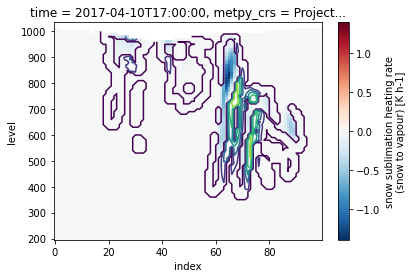

In [37]:
cross_p['tsubs'].plot()
(edge_mask * cross_p['SWC']).plot.contour()